In [83]:
%matplotlib inline

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [85]:
passengers_data = pd.read_csv("data/train.csv", true_values=["True"], false_values=["False"])

In [86]:
passengers_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [87]:
passengers_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [88]:
passengers_data.PassengerId.sample(50)

1189    1261_01
7108    7576_02
3775    4031_02
7964    8508_02
7441    7955_01
1829    1959_01
1672    1771_01
5801    6139_03
8302    8862_04
6420    6779_04
6550    6912_01
2231    2390_01
7600    8122_02
884     0947_01
3091    3331_01
6082    6430_01
8193    8759_01
4550    4841_02
7553    8075_01
750     0789_01
1541    1633_01
7064    7518_01
3263    3499_03
1146    1211_06
3942    4208_01
355     0389_01
3202    3445_01
8319    8883_01
6703    7074_01
4849    5174_02
3112    3353_06
6319    6675_02
7916    8457_01
7692    8208_01
1419    1500_04
6340    6708_03
1346    1424_01
4759    5080_01
611     0639_01
167     0192_02
1971    2105_01
8223    8789_01
3006    3256_01
1968    2102_01
1706    1812_01
6034    6380_02
6380    6745_01
1519    1613_01
3577    3850_04
7790    8318_01
Name: PassengerId, dtype: object

In [89]:
passengers_data.HomePlanet.value_counts(dropna= False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [90]:
passengers_data.HomePlanet.astype("category")

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: category
Categories (3, object): ['Earth', 'Europa', 'Mars']

In [91]:
passengers_data.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [92]:
destinations = passengers_data.Destination.value_counts().sort_values(ascending=True)

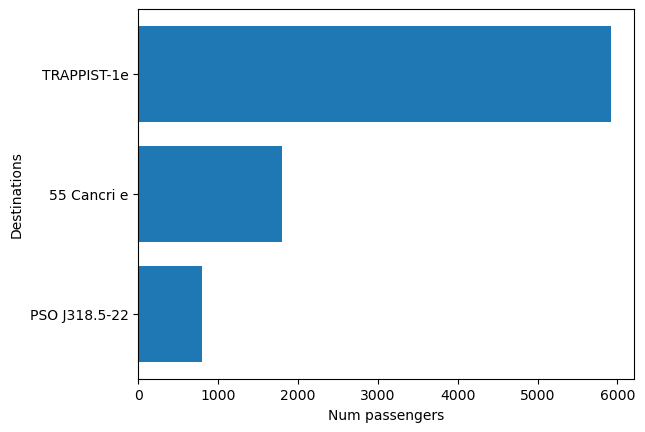

In [93]:
plt.barh(destinations.index, destinations)
plt.xlabel("Num passengers")
plt.ylabel("Destinations")
plt.show()

In [94]:
num_passengers = passengers_data.PassengerId.str.split("_", expand=True)[0].value_counts().value_counts()

<BarContainer object of 8 artists>

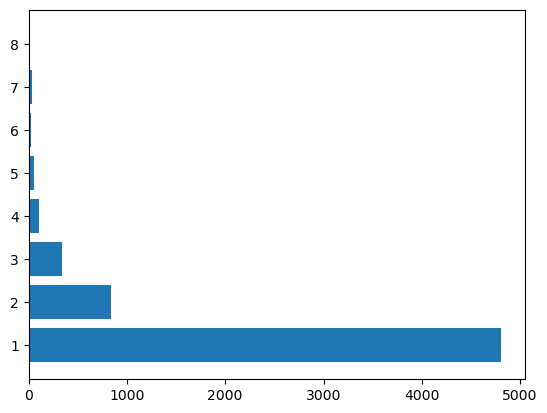

In [95]:
plt.barh(num_passengers.index, num_passengers)

In [96]:
passengers_data.Transported.value_counts(dropna=False)

True     4378
False    4315
Name: Transported, dtype: int64

In [97]:
passenger_attributes = passengers_data.drop(columns=["Transported"]) # X
passenger_labels = passengers_data.Transported # y

In [98]:
passenger_attributes = passenger_attributes.drop(columns=["PassengerId", "Name", "Cabin"])

In [99]:
passenger_attributes = pd.get_dummies(passenger_attributes, drop_first= True)

In [100]:
passenger_attributes = passenger_attributes.dropna()

In [101]:
passenger_labels = passenger_labels.loc[passenger_attributes.index]

In [102]:
model = LogisticRegression(C=1e9)

In [103]:
model.fit(passenger_attributes, passenger_labels)

/Users/ivelin.borisov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [104]:
model.score(passenger_attributes, passenger_labels)

0.7892388451443569

In [105]:
test_passenger_data = pd.read_csv("data/test.csv")

In [106]:
test_passenger_attributes = test_passenger_data

test_passenger_attributes = test_passenger_attributes.drop(columns=["PassengerId", "Name", "Cabin"])
test_passenger_attributes = pd.get_dummies(test_passenger_attributes, drop_first= True)
test_passenger_attributes = test_passenger_attributes.dropna()

In [107]:
test_passenger_attributes

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4270,43.0,47.0,0.0,3851.0,0.0,0.0,0,1,0,0,1,0
4271,40.0,0.0,865.0,0.0,3.0,0.0,0,0,0,0,1,0
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0


In [108]:
model.predict(test_passenger_attributes)

array([ True, False,  True, ...,  True, False,  True])

In [109]:
passenger_labels

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 7620, dtype: bool

In [110]:
print(classification_report(passenger_labels, model.predict(passenger_attributes)))

              precision    recall  f1-score   support

       False       0.79      0.78      0.79      3789
        True       0.79      0.80      0.79      3831

    accuracy                           0.79      7620
   macro avg       0.79      0.79      0.79      7620
weighted avg       0.79      0.79      0.79      7620



In [111]:
model.coef_

array([[-8.95500119e-05, -1.45708598e-03,  5.54117951e-04,
         5.53099243e-04, -1.98414400e-03, -1.66752385e-03,
         1.81602058e+00,  5.58052895e-01,  1.44699680e+00,
        -3.84670509e-01, -6.42264287e-01, -1.79212286e-02]])

In [112]:
list(zip(passenger_attributes.columns.tolist(), model.coef_[0,:].tolist()))

[('Age', -8.955001193755043e-05),
 ('RoomService', -0.0014570859796882644),
 ('FoodCourt', 0.0005541179512096764),
 ('ShoppingMall', 0.0005530992429165615),
 ('Spa', -0.001984143999630403),
 ('VRDeck', -0.001667523846297044),
 ('HomePlanet_Europa', 1.8160205773155522),
 ('HomePlanet_Mars', 0.558052895314451),
 ('CryoSleep_True', 1.4469967994833153),
 ('Destination_PSO J318.5-22', -0.3846705093055207),
 ('Destination_TRAPPIST-1e', -0.6422642867212831),
 ('VIP_True', -0.017921228583510612)]

In [113]:
model

LogisticRegression(C=1000000000.0)

In [114]:
model_2 = LogisticRegression(C=1e-9)

In [115]:
model_2.fit(passenger_attributes, passenger_labels)

LogisticRegression(C=1e-09)

In [116]:
model_2.coef_

array([[-2.52137344e-06, -3.75334556e-04,  1.45306215e-04,
         2.39715436e-05, -3.89305312e-04, -3.53410277e-04,
         3.47446161e-07,  3.78495341e-08,  6.88461160e-07,
        -1.52117229e-08, -1.76473539e-07, -1.12834574e-08]])

In [117]:
list(zip(passenger_attributes.columns.tolist(), model_2.coef_[0,:].tolist()))

[('Age', -2.52137343930126e-06),
 ('RoomService', -0.000375334555561693),
 ('FoodCourt', 0.00014530621529023195),
 ('ShoppingMall', 2.3971543598033447e-05),
 ('Spa', -0.00038930531211207203),
 ('VRDeck', -0.00035341027689367066),
 ('HomePlanet_Europa', 3.474461607842958e-07),
 ('HomePlanet_Mars', 3.784953410011661e-08),
 ('CryoSleep_True', 6.884611596547046e-07),
 ('Destination_PSO J318.5-22', -1.521172290921789e-08),
 ('Destination_TRAPPIST-1e', -1.7647353899822583e-07),
 ('VIP_True', -1.128345744319944e-08)]

In [118]:
model_3 = LogisticRegression(C=1)

In [119]:
model_3.fit(passenger_attributes, passenger_labels)

/Users/ivelin.borisov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [120]:
list(zip(passenger_attributes.columns.tolist(), model_3.coef_[0,:].tolist()))

[('Age', -0.0010646545499242478),
 ('RoomService', -0.0013893527714261213),
 ('FoodCourt', 0.0005697423053994423),
 ('ShoppingMall', 0.0005888966267575784),
 ('Spa', -0.0018724006634473517),
 ('VRDeck', -0.0016912230757612473),
 ('HomePlanet_Europa', 1.6690336757222897),
 ('HomePlanet_Mars', 0.5080215048972752),
 ('CryoSleep_True', 1.3576209181435117),
 ('Destination_PSO J318.5-22', -0.33771562699065893),
 ('Destination_TRAPPIST-1e', -0.6183767343405171),
 ('VIP_True', -0.014508748207771722)]

In [121]:
model_4 = LogisticRegression(penalty='l1', C=1e-3, solver='liblinear')

In [122]:
model_4.fit(passenger_attributes, passenger_labels)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [123]:
passenger_attributes

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0


In [124]:
passenger_labels

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 7620, dtype: bool

In [125]:
scaler = MinMaxScaler()
passenger_attributes = scaler.fit_transform(passenger_attributes)

In [126]:
passenger_attributes_train, passenger_attributes_test, passenger_labels_train, passenger_labels_test = train_test_split(passenger_attributes, passenger_labels, test_size=1500, random_state=42120)

In [127]:
passenger_attributes_train.shape, passenger_attributes_test.shape, passenger_labels_train.shape, passenger_labels_test.shape

((6120, 12), (1500, 12), (6120,), (1500,))

In [128]:
model = LogisticRegression(C=1000000, max_iter=100000)

In [129]:
model.fit(passenger_attributes_train, passenger_labels_train)

LogisticRegression(C=1000000, max_iter=100000)

In [130]:
model.score(passenger_attributes_train, passenger_labels_train)

0.790359477124183

In [131]:
model.score(passenger_attributes_test, passenger_labels_test)

0.7926666666666666

In [132]:
grid_search = GridSearchCV(LogisticRegression(), param_grid={
    "C": [0.01, 0.1, 100, 10_000],
    "penalty": ["l1", "l2"]
}, cv=4)

In [133]:
grid_search.fit(passenger_attributes_train, passenger_labels_train)

/Users/ivelin.borisov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ivelin.borisov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 100, 10000], 'penalty': ['l1', 'l2']})

In [134]:
grid_search.best_estimator_

LogisticRegression(C=10000)

In [135]:
grid_search.best_params_

{'C': 10000, 'penalty': 'l2'}

In [136]:
grid_search.cv_results_

{'mean_fit_time': array([0.00043231, 0.02880651, 0.00121301, 0.01078707, 0.00101227,
        0.04027903, 0.00025082, 0.03990173]),
 'std_fit_time': array([2.75481365e-04, 3.05542428e-02, 4.91364304e-04, 3.28795641e-03,
        3.60313164e-04, 4.21263712e-03, 1.41080555e-05, 8.99011841e-03]),
 'mean_score_time': array([0.        , 0.00082016, 0.        , 0.00061798, 0.        ,
        0.00122285, 0.        , 0.00082552]),
 'std_score_time': array([0.        , 0.00023056, 0.        , 0.00026473, 0.        ,
        0.00105111, 0.        , 0.00052234]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 100, 100, 10000, 10000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.

In [137]:
grid_search.best_estimator_.score(passenger_attributes_train, passenger_labels_train)

0.7905228758169934

In [138]:
grid_search.best_estimator_.score(passenger_attributes_test, passenger_labels_test)

0.7926666666666666

In [139]:
print(classification_report(passenger_labels_test , grid_search.best_estimator_.predict(passenger_attributes_test)))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79       750
        True       0.78      0.81      0.80       750

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500



# Decision Trees

In [140]:
# tree = DecisionTreeClassifier(min_samples_leaf=10)
# tree = DecisionTreeClassifier(max_depth=10)

In [141]:
# tree.fit(passenger_attributes_train, passenger_labels_train)

In [142]:
# tree.score(passenger_attributes_train, passenger_labels_train)

In [143]:
# tree.score(passenger_attributes_test, passenger_labels_test)

In [144]:
# plot_tree(tree)

In [145]:
# plt.figure(figsize=(30, 10))
# plot_tree(tree)
# plt.show()

In [146]:
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid = {"max_depth": [2, 5, 10, 18, 20, 25, 30, None], "min_samples_split": [10, 20, 25, 40]}, cv=5)

In [147]:
grid_search_tree.fit(passenger_attributes_train, passenger_labels_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 18, 20, 25, 30, None],
                         'min_samples_split': [10, 20, 25, 40]})

In [148]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=40)

In [149]:
grid_search_tree.best_estimator_.score(passenger_attributes_train, passenger_labels_train)

0.8142156862745098

In [150]:
grid_search_tree.best_estimator_.score(passenger_attributes_test, passenger_labels_test)

0.7706666666666667

In [151]:
grid_search_tree.cv_results_

{'mean_fit_time': array([0.00323906, 0.00337644, 0.0025775 , 0.00252013, 0.00978966,
        0.00776234, 0.00538616, 0.004986  , 0.00815945, 0.00804362,
        0.00803089, 0.00789142, 0.0104342 , 0.00987267, 0.00974879,
        0.00953841, 0.01031013, 0.00994229, 0.0098721 , 0.00945382,
        0.01044912, 0.01010652, 0.01004443, 0.00967131, 0.01046281,
        0.01010342, 0.00996366, 0.00984497, 0.01066155, 0.01009674,
        0.00997128, 0.00959902]),
 'std_fit_time': array([1.23602441e-03, 1.08475063e-03, 5.34145740e-05, 1.19298901e-05,
        7.84869183e-03, 3.99462936e-03, 1.74209857e-04, 1.35333022e-04,
        1.33749499e-04, 1.15648357e-04, 3.21279983e-05, 8.83077442e-05,
        1.64995193e-04, 1.26679758e-04, 2.08541372e-04, 3.37012568e-04,
        1.46206266e-04, 2.28396736e-04, 2.02121850e-04, 2.96754517e-04,
        2.19863321e-04, 2.59736986e-04, 3.25349058e-04, 2.83634133e-04,
        2.13644727e-04, 3.28431900e-04, 2.74504786e-04, 3.50708637e-04,
        2.35445434e-0

In [152]:
best_tree = grid_search_tree.best_estimator_

In [153]:
best_tree.feature_importances_

array([4.33111458e-02, 7.75798582e-02, 8.61832972e-02, 2.96239670e-02,
       1.25251757e-01, 1.40724470e-01, 4.59123983e-02, 2.58427068e-02,
       4.17282709e-01, 1.94405516e-03, 6.24325069e-03, 1.00384688e-04])

In [154]:
passenger_attributes

array([[4.93670886e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.03797468e-01, 7.60801284e-03, 3.01881729e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.34177215e-01, 3.00132617e-03, 1.19947674e-01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [3.29113924e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.05063291e-01, 0.00000000e+00, 3.51859927e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.56962025e-01, 8.79458365e-03, 1.57246839e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [155]:
print(passengers_data.sample.__doc__)


        Return a random sample of items from an axis of object.

        You can use `random_state` for reproducibility.

        Parameters
        ----------
        n : int, optional
            Number of items from axis to return. Cannot be used with `frac`.
            Default = 1 if `frac` = None.
        frac : float, optional
            Fraction of axis items to return. Cannot be used with `n`.
        replace : bool, default False
            Allow or disallow sampling of the same row more than once.
        weights : str or ndarray-like, optional
            Default 'None' results in equal probability weighting.
            If passed a Series, will align with target object on index. Index
            values in weights not found in sampled object will be ignored and
            index values in sampled object not in weights will be assigned
            weights of zero.
            If called on a DataFrame, will accept the name of a column
            when axis = 0.
          

In [156]:
passengers_data.sample(200000, replace=True).index.value_counts()

1130    41
695     41
5517    41
8005    40
5651    40
        ..
3837     8
355      8
2693     8
8675     6
3279     6
Length: 8693, dtype: int64

In [183]:
# Bagging -> random samples
# x1 = passengers_data.sample(5000, replace=True)
# x2 = passengers_data.sample(5000, replace=True)
# x = passengers_data.sample(5000, replace=True)
bagging_classifier = BaggingClassifier(n_estimators=20, estimator=LogisticRegression())
bagging_classifier.fit(passenger_attributes_train, passenger_labels_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=20)

In [177]:
tree1 = DecisionTreeClassifier()
tree1.fit(x1)

TypeError: DecisionTreeClassifier.fit() missing 1 required positional argument: 'y'

# Random forest => random samples + random features

In [179]:
forest = RandomForestClassifier(max_depth=5, n_estimators=2000, min_samples_split=40)

In [180]:
forest.fit(passenger_attributes_train, passenger_labels_train)

RandomForestClassifier(max_depth=5, min_samples_split=40, n_estimators=2000)

In [181]:
forest.score(passenger_attributes_train, passenger_labels_train)

0.7919934640522875

In [182]:
forest.score(passenger_attributes_test, passenger_labels_test)

0.7826666666666666